# Linear Regression using gradient descent optimisation

In [1]:
import numpy as np

class LinearRegression:

    def __init__(self, lr=.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        #init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr*dw
            self.bias -= self.lr*db


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

# Split the data to train and test data

In [2]:
def train_test_split(X, y, test_size=.2):
    indices = np.random.permutation(X.shape[0])
    n = int(X.shape[0]*(1-.2))
    training_idx, test_idx = indices[:n], indices[n:]
    X_train, X_test = X.iloc[training_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[training_idx], y.iloc[test_idx]
    
    return X_train,X_test,y_train,y_test


In [3]:
def standard_scalar(x):
    m = np.mean(x)
    s = np.sqrt(np.var(x))
    return ((x - m)/s)

In [4]:
def remove_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    return q1 - iqr*1.5, q3 + iqr*1.5

# Data preprocessing steps

In [5]:
import pandas as pd
data = pd.read_csv("/home/ibab/Downloads/Assignment/diamonds.csv")
data.sample(5)
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
req_data = data.drop(columns=["Unnamed: 0"])
#Dropping dimentionless diamonds

req_data.drop(req_data[req_data["x"]==0].index,inplace=True)
req_data.drop(req_data[req_data["y"]==0].index,inplace=True)
req_data.drop(req_data[req_data["z"]==0].index,inplace=True)

req_data.count()

carat      53920
cut        53920
color      53920
clarity    53920
depth      53920
table      53920
price      53920
x          53920
y          53920
z          53920
dtype: int64

In [7]:
#one hot encoding
req_data = pd.get_dummies(req_data, columns=["cut", "color", "clarity" ], drop_first=True)
req_data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

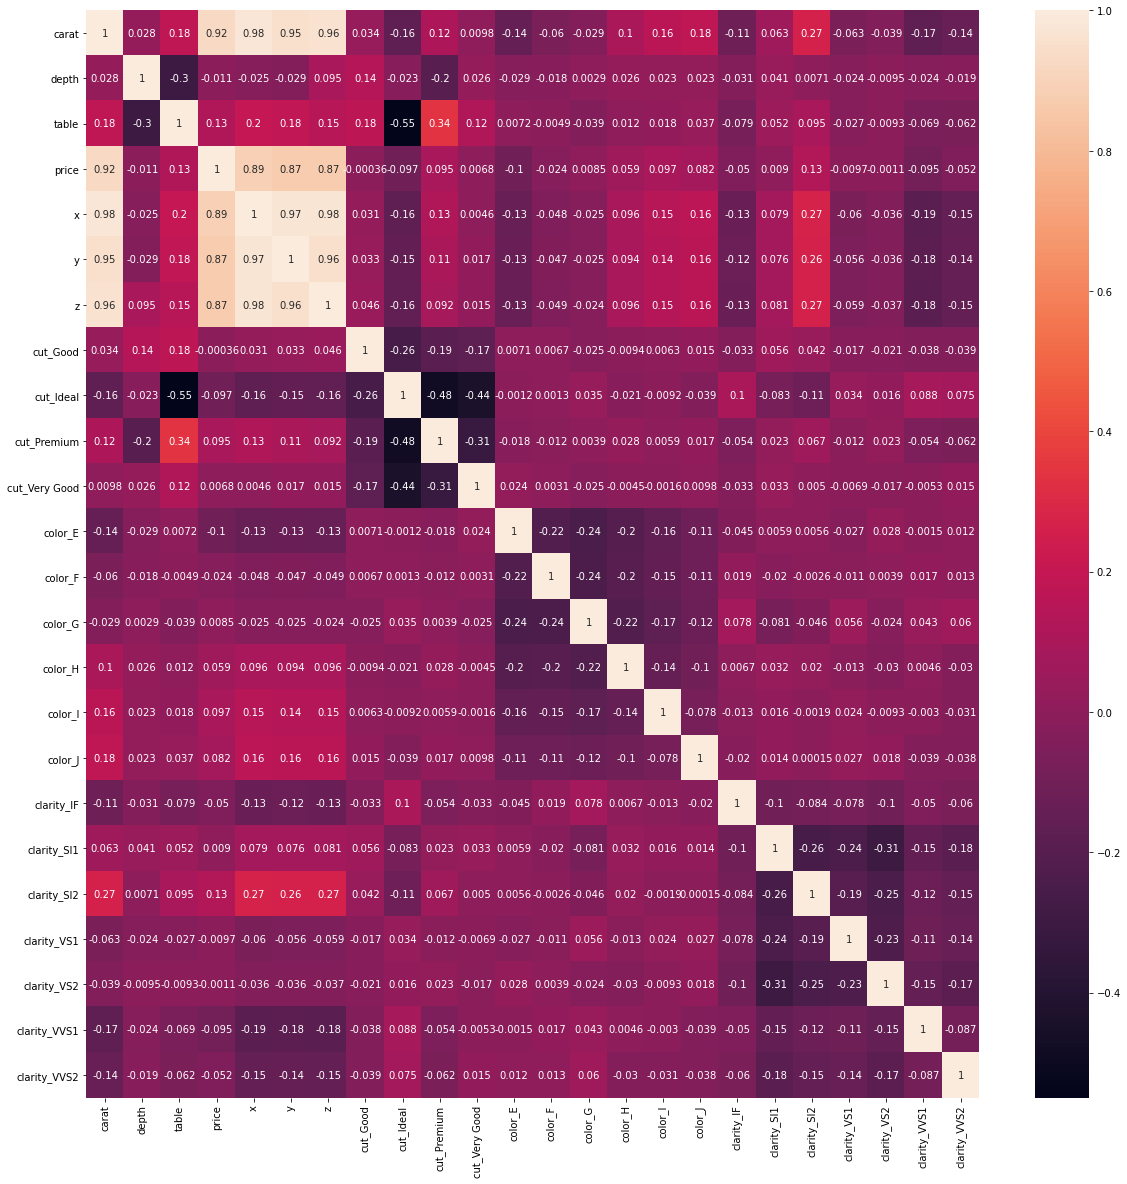

In [8]:
#Visualize to understand the features correlating with price
import matplotlib.pyplot as plt

import seaborn as sns
corrmat= req_data.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,annot=True, )

In [9]:
#removing outliers

c1, c2 = remove_outliers(req_data["carat"])
p1, p2 = remove_outliers(req_data["price"])
x1, x2 = remove_outliers(req_data["x"])
y1, y2 = remove_outliers(req_data["y"])
z1, z2 = remove_outliers(req_data["z"])

req_data.drop(req_data[req_data["carat"] > c2].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["carat"] < c1].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["price"] > p2].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["price"] < p1].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["x"] > x2].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["x"] < x1].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["y"] > y2].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["y"] < y1].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["z"] > z2].index, axis=0, inplace=True)
req_data.drop(req_data[req_data["z"] < z1].index, axis=0, inplace=True)

In [10]:
#feature scaling of inputs
features = ["depth", "table", "x", "y", "z"]
req_data[features] = req_data[features].apply(standard_scalar)
req_data.sample(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
7577,1.00,0.807977,-0.636609,4255,0.804242,0.868784,0.954268,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12697,0.38,0.174525,-1.983600,599,-0.910339,-0.889018,-0.876370,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2361,0.70,0.807977,1.608376,3175,0.079628,-0.004977,0.146149,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3882,0.90,0.948744,2.506370,3484,0.477656,0.539838,0.640916,1,0,0,...,1,0,0,0,1,0,0,0,0,0
42008,0.51,-0.036626,0.261385,1265,-0.440870,-0.518955,-0.480556,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Multivariate Linear Regression

Four predictors were identified from the heatmap to predict the price, these are: carat, x , y , z

    
  

In [11]:
#Multivariate Linear Regression Model with predictors 

X = req_data.drop(columns="price")
y = req_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



In [12]:
#model fitting 

model = LinearRegression(lr=0.1,n_iters=1000)
model.fit(X_train, y_train)
predicted = model.predict(X_test)


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_value = mse(y_test, predicted)
print(mse_value)

726564.7164573277


Text(0, 0.5, 'actual price')

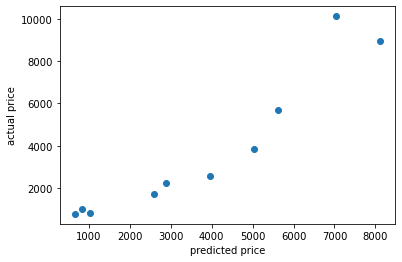

In [13]:
m, b = model.weights, model.bias
m, b

#comparing

plt.scatter(predicted[:10],y_test[:10])
plt.xlabel("predicted price")
plt.ylabel("actual price")

In [14]:
#calculating R2 for multivariate gradient descent
R2 = 1 - np.sum((predicted - y_test) ** 2)/np.sum((y_test - np.mean(y_test)) ** 2)
print(R2)

0.9013320570413172


In [15]:
#Multivariate Linear Regression Model with 4 predictors selected from heatmap

X = req_data[["carat","x","y","z"]]
y = req_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



In [16]:
#model fitting

model = LinearRegression(lr=0.1,n_iters=2000)
model.fit(X_train, y_train)
predicted = model.predict(X_test)


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_value = mse(y_test, predicted)
print(mse_value)

1138010.5796158896


[4159.58678925 9972.07550181  425.67857823 7031.87708321  615.86372341
 1520.83785587 1130.53888766 1854.45745591 1920.29880591]
[4460 7713  890 7983  640 1348 1151 1436 1689]


Text(0, 0.5, 'actual price')

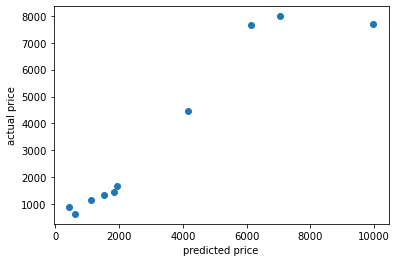

In [17]:
m, b = model.weights, model.bias
m, b

#comparing
print(predicted[1:10])
print(np.array(y_test[1:10]))

plt.scatter(predicted[:10],y_test[:10])
plt.xlabel("predicted price")
plt.ylabel("actual price")

In [18]:
#calculating R2 for multivariate gradient descent
R2 = 1 - np.sum((predicted - y_test) ** 2)/np.sum((y_test - np.mean(y_test)) ** 2)
print(R2)

0.8500398068206871


# Univariate Linear Regression

For predicting the price, carat was used as the predictor

In [19]:
#Univariate Linear Regression Model 

X = req_data[["carat"]]
y = req_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [20]:
#model fitting

model = LinearRegression(lr=0.01,n_iters=2000)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_value = mse(y_test, predicted)
print(mse_value)

1132443.5734558017


In [21]:
m, b = model.weights, model.bias
m, b

(array([6597.93683446]), -1592.8916753697258)

In [22]:
model.predict(X_test)

array([5202.98326413, 5005.04515909,  716.38621669, ..., 1178.24179511,
       4345.25147565, 3487.51968717])

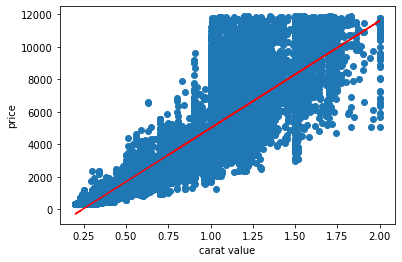

In [23]:
yhat = m*X + b
plt.scatter(X, y)
plt.plot(X, yhat, color="red")
plt.xlabel("carat value")
plt.ylabel("price")
plt.show()

In [24]:
#calculating R2 for univariate gradient descent
yhat = yhat.values.reshape(50170,)
R2 = 1 - np.sum((yhat - y) ** 2)/np.sum((y - np.mean(y)) ** 2)
print(R2)

0.8438722086199412


# Closed form solution

In [25]:
X = req_data["carat"]
y = req_data["price"]
n_points = X.shape[0]
X_dummied = np.zeros((n_points, 2))
X_dummied[:,1] = 1
X_dummied[:,0] = X
print(X_dummied)

[[0.23 1.  ]
 [0.21 1.  ]
 [0.23 1.  ]
 ...
 [0.7  1.  ]
 [0.86 1.  ]
 [0.75 1.  ]]


In [26]:
m_disc, b_disc = np.linalg.inv(X_dummied.T@X_dummied)@(X_dummied.T@y)
m_disc, b_disc

(6751.223726763277, -1711.8314875850501)

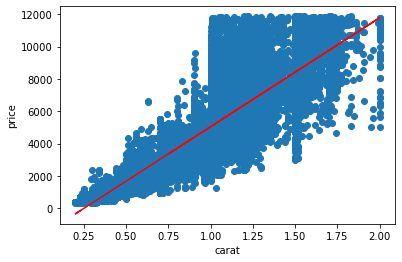

In [27]:
yhat = m_disc*X + b_disc
plt.scatter(X, y)
plt.plot(X, yhat, color="red")
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [28]:
#calculating R2 for univariate closed form
R2 = 1 - np.sum((yhat - y) ** 2)/np.sum((y - np.mean(y)) ** 2)
print(R2)

0.8443182468399386


# Newtons method

In [29]:
#X = req_data[["carat","x","y","z"]]
X = req_data.drop(columns="price")
y = req_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [30]:
#Newton's method 
def newton_method(n_iters, X, y):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    for _ in range(n_iters):
        y_pred = np.dot(X, weights) + bias

        dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
        db = (2/n_samples) * np.sum(y_pred - y)
        
        ddw = (2/n_samples) * np.sum(X ** 2)
        ddb = (2/n_samples) * n_samples

        weights -= dw/ddw
        bias -= db/ddb
        
    return weights, bias
        

        

In [31]:
def predict(X, weights, bias):
    y_pred = np.dot(X, weights) + bias
    return y_pred

In [32]:
weight, bias = newton_method(100,X_train.values,y_train)
weight, bias

(array([ 869.24916888,  -35.6708    ,  -48.02632139,  770.31907594,
         812.65458621,  752.41130441,  -20.73944797,  212.03749388,
         155.56437342,  144.45100992,  184.60630164,  158.37714003,
         176.80476795,  -79.1907237 , -251.82203262, -366.70890587,
         257.45005902, -282.5372926 , -742.12316221,  294.94047727,
         145.56139289,  394.64136879,  531.87784071]),
 2327.8943980651056)

In [33]:
#check 
pred = predict(X_test, weight, bias)
print(pred.round()[:10], np.array(y_test)[:10])

[7566. 5990. 5302.  938. 5057.  413. 5499.  704. -124. -608.] [ 8827 11605  4425   873  5002   764  6328   722   673   492]


Text(0, 0.5, 'actual price')

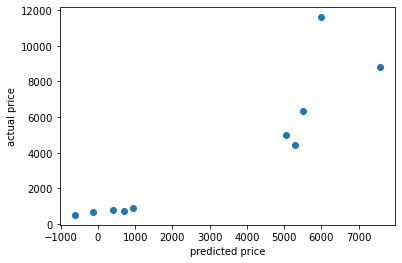

In [34]:
plt.scatter(pred.round()[:10],np.array(y_test)[:10])
plt.xlabel("predicted price")
plt.ylabel("actual price")

In [35]:
#calculating R2 for multivariate newtons method 
R2 = 1 - np.sum((pred - y_test) ** 2)/np.sum((y_test - np.mean(y_test)) ** 2)
print(R2)

0.8562557931729613


In [48]:
X = req_data[["carat"]]
np.sqrt(np.var(X))

carat    0.372202
dtype: float64

In [51]:
m = .92*2734/.3722
m


6757.872111767868

In [54]:
b = np.mean(y) - m * np.mean(X) 
b

carat   -1716.600813
dtype: float64